In [1]:
import os
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import cluster

from scipy.cluster.hierarchy import dendrogram , linkage, fcluster

from pandas.plotting import scatter_matrix


In [2]:
def Corr_plot(corr):
     mask = np.triu(np.ones_like(corr, dtype=bool))
     f, ax = plt.subplots(figsize=(11, 9))
     cmap = sns.diverging_palette(230, 20, as_cmap=True)
     sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
     pass

In [3]:
def Inertie_Plot(inertie):
        p = len(inertie)
        plt.plot(np.arange(1,p+1),np.cumsum(inertie))
        plt.title("Explained variance vs. # of factors")
        plt.ylabel("Cumsum explained variance ratio")
        plt.xlabel("Factor number")
        plt.show()

* chargement des données

In [5]:
#path = 'F:/ENSEIGNEMENTS_INDEV/ENSEIGNEMENTS/TP_DRIO_ACP_CAH/2020-2021/PYTHON' ; os.chdir(path)
datas = pd.read_excel('INFARCTUS.xlsx',sheet_name=0,header=0,index_col=0)

* Partition du jeux de données numériques et catégorielle

In [6]:
X = ....
Y =.....

In [26]:
def ACP(X, Y = None, select_Axe = [0,1]):
        
        n, p = X.shape
        # entêtes variable pour transformation en dataframe
        Col_name = X.columns.to_list()
        Dim_name = ['Dim_' + str(i+1) for i in range(0,p)] 
        
        #____ DONNEES CENTREES REDUITES ____________
        # appel de la fonction
        sc = .....
        # données centrées et réduites
        Z  = ..... 
        # mise en forme : dateframe
        Z  = ....
               
        #_________ MATRICE DES CORRELATION ____________
        #--> matrice des corrélations
        cor =....
        #--> graphique : appple de la fonction Corr_plot
        Corr_plot(X)
        
        #_________ DIAGONALISATION ____________
        # on utilise la fonction importée ACP
        acp     = ....
        # on extrait les coordonnées (scores) des individus sur les axes factoriels (Scores en anglais)
        coord   = .... 
        # on extrait les vecteurs propres (loading factors en anglais)
        loading    = ....
        #... que l'on intégre dans un dataframe
        Loading    = .....
       
        #_________ VARIANCES (VALEURS PROPRES) __________________
        # !!!! Attention sklearn necessite une correction cf.tuto!!!!
        # les résultats sont directement insérés dans le dataframe
        Inertie = pd.DataFrame(
                    {'Variances'    : ....          , 
                     'Inertie'      : ....            ,
                     'Inertie_cum'  : ....
                    }, index = Dim_name
        )
         
        #_________ INDIVIDUS __________________
        #--> Les résultats sont insérés dans le dictionnaire Ind
        # Concernant le calcul de la qualité de représentation des individus, se référer au tuto ACP page 11
        di = ....
        cos2 = ....
        for j in range(p): .....
        
        Ind = dict({ 'Scores' :  pd.DataFrame(coord, columns = Dim_name),
                      'Cos2'   : pd.DataFrame(cos2, columns = Dim_name)
                    })
        
        
        #_________ VARIABLES __________________
        # Concernant le calcul des coordonnées des variables, se référer au tuto ACP p13,14
        # l'ACP est avec python réalisé dans l'espace des variables, la formule de transition décrité dans le cours permet de calculer 
        # les coordonnées des variables dans l'espace des individus (espaces duales)... 
        # correction de la variance
        sqrt_eigval = .....
        coord = np.zeros((p,p))
        for k in range(p): ......
               
        Var = dict({'Coord'   : pd.DataFrame(coord, index = Col_name, columns = Dim_name),
                    'Cos2'    : ......,
                    'Cos2_cum': .....
                   })
        
        #___________ Intégration des résultats dans un dictionnaire       
        res = dict({'Z'        : Z       , 
                    'Corr'     : cor     ,
                    'Inertie'  : Inertie ,
                    'Loading'  : Loading ,
                    'Ind'      : Ind     ,
                    'Var'      : Var    
                   })
        return(res)
        



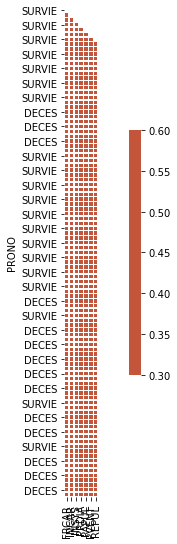

In [27]:
# Run function
myacp = ACP(X, Y = None, select_Axe = [0,1])


In [194]:
myacp['Corr']


,FRCAR,INCAR,INSYS,PRDIA,PAPUL,PVENT,REPUL
FRCAR,1.000000,-0.112049,-0.502533,0.398754,0.370121,-0.085463,0.247004
INCAR,-0.112049,1.000000,0.887108,-0.360637,-0.269422,-0.281961,-0.766976
INSYS,-0.502533,0.887108,1.000000,-0.482706,-0.405471,-0.201240,-0.735106
PRDIA,0.398754,-0.360637,-0.482706,1.000000,0.927825,0.284668,0.701430
PAPUL,0.370121,-0.269422,-0.405471,0.927825,1.000000,0.244197,0.650415
PVENT,-0.085463,-0.281961,-0.201240,0.284668,0.244197,1.000000,0.257602
REPUL,0.247004,-0.766976,-0.735106,0.701430,0.650415,0.257602,1.000000


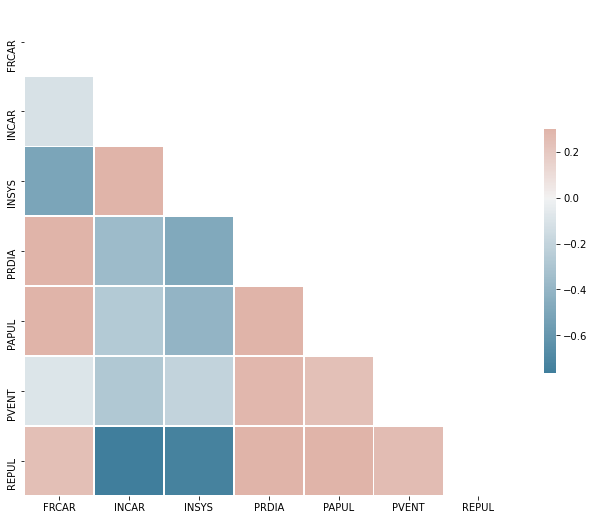

In [193]:
Corr_plot(myacp['Corr'])

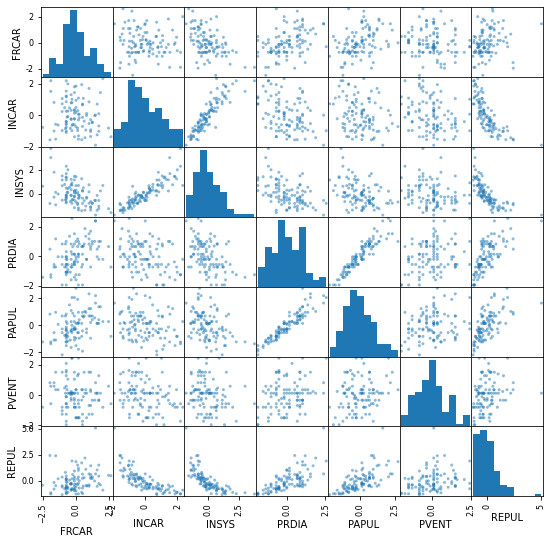

In [267]:
 g =  pd.plotting.scatter_matrix(myacp['Z'],figsize =(9,9))

In [183]:
myacp['Inertie']


,Variances,Inertie,Inertie_cum
Dim_1,3.786570,54.093856,54.093856
Dim_2,1.225948,17.513550,71.607406
Dim_3,1.093059,15.615123,87.222529
Dim_4,0.658235,9.403351,96.625880
Dim_5,0.147860,2.112283,98.738163
Dim_6,0.067611,0.965872,99.704035
Dim_7,0.020718,0.295965,100.000000


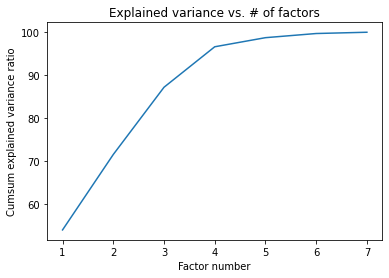

In [196]:
Inertie_Plot(myacp['Inertie'].iloc[:,1])       

In [187]:
myacp['Ind']['Scores']

,Dim_1,Dim_2,Dim_3,Dim_4,Dim_5,Dim_6,Dim_7
0,-0.442195,-1.204536,-0.484044,1.368739,-0.116886,-0.144164,-0.068758
1,1.089719,-0.032216,-1.027212,0.290435,-0.272710,-0.089245,-0.018801
2,1.726006,0.638487,1.267994,0.553009,-0.055407,-0.135923,0.184632
3,-1.348225,-1.067012,0.213129,0.283729,-0.207379,-0.144814,-0.044597
4,0.717382,-1.055018,-1.736764,0.764803,-0.160012,0.031096,-0.038881
...,...,...,...,...,...,...,...
96,1.334272,-0.377798,2.955944,1.405400,0.429400,0.058090,0.432588
97,-0.413552,0.704814,1.579468,-0.239048,-0.263849,-0.056268,0.002330
98,2.398801,-0.822304,1.051256,-0.608940,0.403411,-0.258870,-0.049219
99,5.937709,0.042457,0.503338,-1.289022,2.386957,-0.371518,-0.143551


In [188]:
myacp['Ind']['Cos2']

,Dim_1,Dim_2,Dim_3,Dim_4,Dim_5,Dim_6,Dim_7
0,0.051547,0.382486,0.061765,0.493875,0.003602,0.005479,0.001246
1,0.492584,0.000431,0.437695,0.034990,0.030850,0.003304,0.000147
2,0.556214,0.076114,0.300187,0.057098,0.000573,0.003449,0.006365
3,0.577396,0.361649,0.014429,0.025572,0.013661,0.006661,0.000632
4,0.097894,0.211727,0.573772,0.111264,0.004870,0.000184,0.000288
...,...,...,...,...,...,...,...
96,0.136832,0.010970,0.671573,0.151810,0.014172,0.000259,0.014383
97,0.051945,0.150880,0.757712,0.017356,0.021144,0.000962,0.000002
98,0.707035,0.083084,0.135791,0.045562,0.019996,0.008234,0.000298
99,0.819357,0.000042,0.005888,0.038615,0.132411,0.003208,0.000479


In [189]:
myacp['Var']['Coord']

,Dim_1,Dim_2,Dim_3,Dim_4,Dim_5,Dim_6,Dim_7
FRCAR,0.476700,0.524911,0.500277,0.487421,0.088691,-0.003687,0.038604
INCAR,-0.759086,0.591537,-0.218525,0.090808,0.091679,0.015143,-0.096120
INSYS,-0.850801,0.276721,-0.393934,-0.125244,0.136556,-0.030144,0.095586
PRDIA,0.838287,0.397152,-0.283962,-0.123228,-0.086073,-0.190441,-0.007042
PAPUL,0.781948,0.468501,-0.320142,-0.164088,-0.096122,0.173302,0.019374
PVENT,0.361229,-0.351073,-0.675765,0.536977,0.034555,0.007755,-0.002041
REPUL,0.902551,-0.153140,-0.007799,-0.257429,0.308381,0.009901,-0.020552


In [190]:
myacp['Var']['Cos2']

,Dim_1,Dim_2,Dim_3,Dim_4,Dim_5,Dim_6,Dim_7
FRCAR,0.227243,0.275531,0.250277,0.237579,0.007866,0.000014,0.001490
INCAR,0.576211,0.349916,0.047753,0.008246,0.008405,0.000229,0.009239
INSYS,0.723863,0.076574,0.155184,0.015686,0.018648,0.000909,0.009137
PRDIA,0.702725,0.157730,0.080634,0.015185,0.007409,0.036268,0.000050
PAPUL,0.611443,0.219493,0.102491,0.026925,0.009239,0.030033,0.000375
PVENT,0.130486,0.123252,0.456659,0.288344,0.001194,0.000060,0.000004
REPUL,0.814598,0.023452,0.000061,0.066270,0.095099,0.000098,0.000422


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


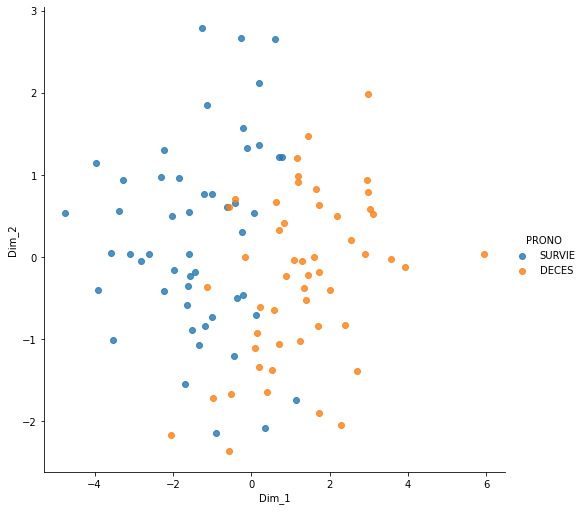

In [260]:
# ___ Représentation des individus en fonction de leur classification
Scores = myacp['Ind']['Scores'].iloc[:,[0,1]]
# Transformation de l'index en liste puis en dataframe
v = pd.DataFrame(Y.index.tolist())
Scores = pd.concat([Scores,v ], axis = 1)
Scores = Scores.rename( columns = {0: 'PRONO'})
g  = sns.lmplot('Dim_1',
                'Dim_2',
                hue='PRONO',
               data= Scores,
               fit_reg=False,
               scatter=True,
               height=7)

plt.show()


###### CAH SUR SCORES

In [29]:
# on effectue une CAH non pas sur les données initiales mais sur les deux premiers axes factoriels
# on sélectionne les coordonnées des individus sur les axes 1 et 2
Scores = ......
# on réalise la CAH avec une metrique euclidienne et une agregation de Ward
cah = .....


<function matplotlib.pyplot.show(close=None, block=None)>

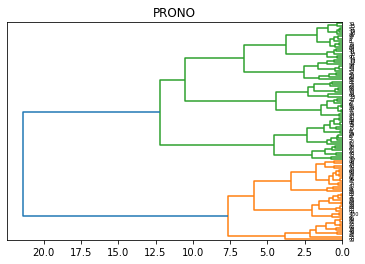

In [31]:
plt.title('PRONO')
# on realise le dendrograme
dendrogram(cah, orientation = 'left', color_threshold = 15)
plt.show
#Réalisation du dendrogramme avec distance = 15


In [33]:
#On réalise le partitionnement(a postériori) en deux groupes fondée sur une distance (chute de l'intertie intra) = 15
groupes_cah = fcluster(.....)
print(groupes_cah)

[2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 2 2 1 2 1 1 2 2
 2 1 2 1 1 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 1 1 2 2 1 1 2 2 2 1 1 2
 2 2 2 1 1 2 1 2 2 1 1 2 1 2 1 1 2 2 2 1 1 1 1 2 1 1 1]


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


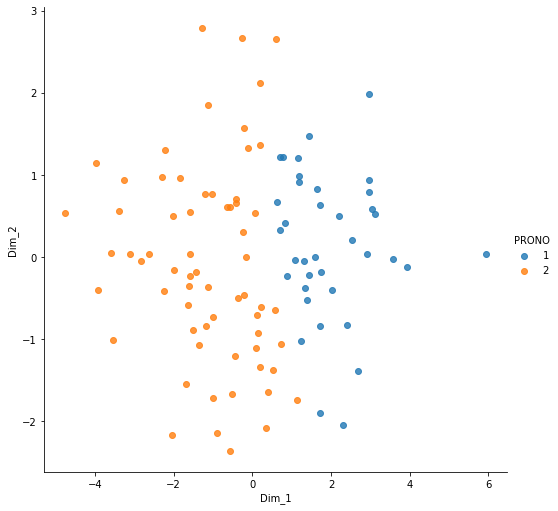

In [34]:
#Visualisation du partitionnement
Scores = myacp['Ind']['Scores'].iloc[:,[0,1]]
v = pd.DataFrame(groupes_cah)
Scores = pd.concat([Scores,v ], axis = 1)
Scores = Scores.rename( columns = {0: 'PRONO'})
g  = sns.lmplot('Dim_1',
                'Dim_2',
                hue='PRONO',
               data= Scores,
               fit_reg=False,
               scatter=True,
               height=7)

plt.show()

# comparer le regroupement réalisée par la CAH avec la variable annotée ....

In [37]:
# on définit par défaut ( apriori) deux groupes on instancie un objet puis on appelle la méthode .fit
kmeans = ......
kmeans.fit(Scores)

KMeans(n_clusters=2)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


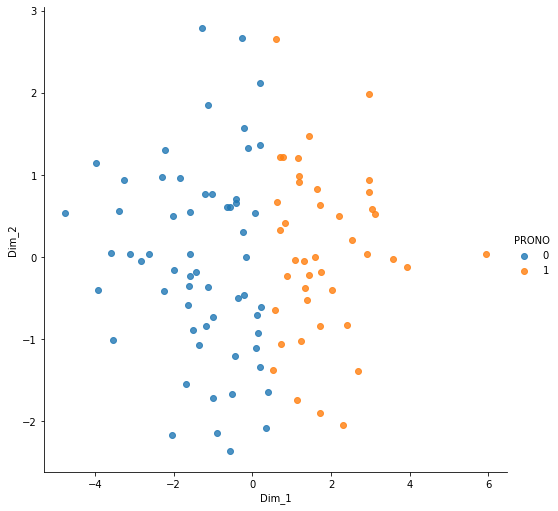

In [38]:
groupes_kmeans = kmeans.labels_ 
# on visualise le partitionnement réalisée avec le kmean
Scores = myacp['Ind']['Scores'].iloc[:,[0,1]]
v = pd.DataFrame(groupes_kmeans)
Scores = pd.concat([Scores,v ], axis = 1)
Scores = Scores.rename( columns = {0: 'PRONO'})
g  = sns.lmplot('Dim_1',
                'Dim_2',
                hue='PRONO',
               data= Scores,
               fit_reg=False,
               scatter=True,
               height=7)

plt.show()




In [40]:
# décrire ce qui est réalisé ici
cah = groupes_cah - 1
km  = groupes_kmeans
b = cah == km
np.where(b == False)

# compléter et analyser les erreurs effectuées par rapport aux données catégorielles

(array([  0,   1,   2,   3,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
         55,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  76,  77,  78,  79,  80,  81,  82,
         83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
         96,  97,  98,  99, 100], dtype=int64),)